In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime

In [22]:
#getting the data of google stock from web
#create a dataset of the price of the stock that you want to predict
#mention the ticker of the stock you want to analyse
ticker = input("Enter the Ticker of the company : " )
dataset = web.DataReader(ticker,data_source='yahoo',start='2010-01-01', end='2020-12-31')


Enter the Ticker of the company : TSLA


In [23]:
dataset.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2647 entries, 2010-06-29 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2647 non-null   float64
 1   Low        2647 non-null   float64
 2   Open       2647 non-null   float64
 3   Close      2647 non-null   float64
 4   Volume     2647 non-null   float64
 5   Adj Close  2647 non-null   float64
dtypes: float64(6)
memory usage: 144.8 KB


Text(0.5, 1.0, 'Opening price of TSLA')

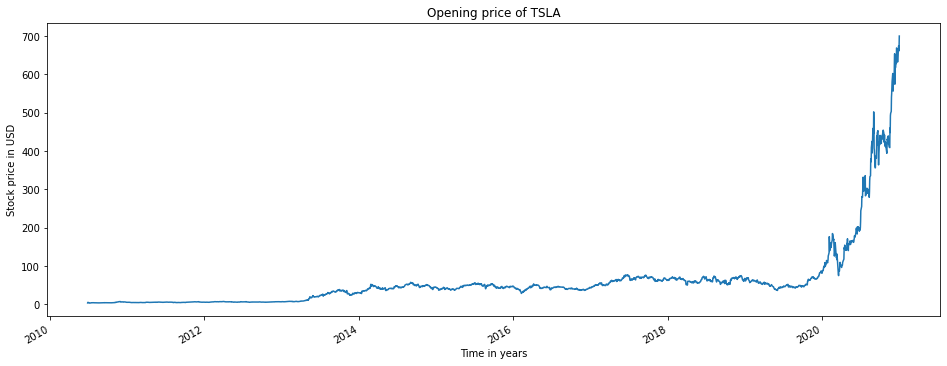

In [27]:
#visualize the opening price of google stock
dataset['Open'].plot(figsize=(16,6))
plt.xlabel('Time in years')
plt.ylabel('Stock price in USD')
plt.title('Opening price of '+ ticker)

In [28]:
# 21 day rolling mean
# just the average for past 3 weeeks
dataset.rolling(21).mean().head(100)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2010-11-11,4.574476,4.330095,4.424095,4.482952,3.339643e+06,4.482952
2010-11-12,4.664667,4.403143,4.493143,4.569524,3.919238e+06,4.569524
2010-11-15,4.779333,4.498095,4.582000,4.667238,4.475952e+06,4.667238


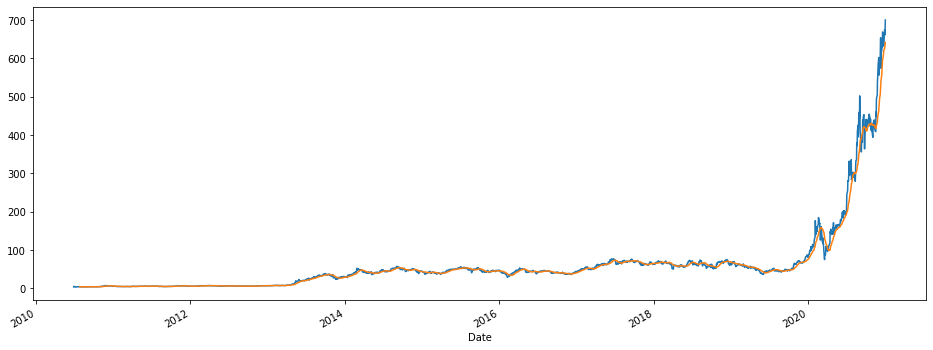

In [29]:
#comparing the above obtained values with actual results
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(21).mean()['Close'].plot()

In [30]:
#create training-set
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [31]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [32]:
# Creating a training set containing values of past 2 months(x-set) and current day value (y-set) 
X_train = []
y_train = []
for i in range(60, len(dataset)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [34]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [35]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
81/81 [==============================] - 14s 107ms/step - loss: 0.0080
Epoch 2/100
81/81 [==============================] - 9s 110ms/step - loss: 0.0010
Epoch 3/100
81/81 [==============================] - 9s 111ms/step - loss: 0.0011
Epoch 4/100
81/81 [==============================] - 9s 109ms/step - loss: 0.0010
Epoch 5/100
81/81 [==============================] - 9s 111ms/step - loss: 8.8163e-04
Epoch 6/100
81/81 [==============================] - 9s 110ms/step - loss: 9.5068e-04
Epoch 7/100
81/81 [==============================] - 9s 110ms/step - loss: 8.1103e-04
Epoch 8/100
81/81 [==============================] - 9s 111ms/step - loss: 7.0991e-04
Epoch 9/100
81/81 [==============================] - 9s 112ms/step - loss: 6.1227e-04
Epoch 10/100
81/81 [==============================] - 9s 110ms/step - loss: 6.0943e-04
Epoch 11/100
81/81 [==============================] - 9s 111ms/step - loss: 6.3083e-04
Epoch 12/100
81/81 [==============================] - 9s 112ms/step

In [38]:
#creating the testing-set
dataset_test = web.DataReader(ticker,data_source='yahoo',start='2021-01-01', end='2021-01-06')

In [39]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [40]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2021-01-04 to 2021-01-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3 non-null      float64
dtypes: float64(1)
memory usage: 48.0 bytes


In [41]:
# Getting the predicted stock price of 2021
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+len(test_set)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [42]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float32
dtypes: float32(1)
memory usage: 140.0 bytes


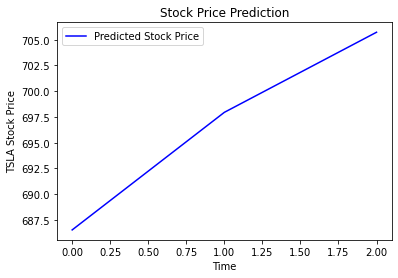

In [44]:
# Visualising the results

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
